# Analysis of World Happiness 2020

> Final Project, required for DS 1.1: Data Analysis, Spring 2020

## Objectives

1. Identify the problem that needs data analysis and visualization
2. Provide data cleaning, data manipulation, and data visualization
3. Report statistics of dataset/Outlier detection, make comparison of samples among different groups,
and find correlation/Scatter plot
4. Communicate with comments and explanations of processes, analysis and interpretation of results





In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('WHR20_DataForFigure2.1.csv')

### Evaluate the dataframe

In [2]:
df.columns

Index(['Country name', 'Regional indicator', 'Ladder score',
       'Standard error of ladder score', 'upperwhisker', 'lowerwhisker',
       'Logged GDP per capita', 'Social support', 'Healthy life expectancy',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption', 'Ladder score in Dystopia',
       'Explained by: Log GDP per capita', 'Explained by: Social support',
       'Explained by: Healthy life expectancy',
       'Explained by: Freedom to make life choices',
       'Explained by: Generosity', 'Explained by: Perceptions of corruption',
       'Dystopia + residual'],
      dtype='object')

In [3]:
df.head

<bound method NDFrame.head of                  Country name  Regional indicator  Ladder score  \
0                     Finland      Western Europe        7.8087   
1                     Denmark      Western Europe        7.6456   
2                 Switzerland      Western Europe        7.5599   
3                     Iceland      Western Europe        7.5045   
4                      Norway      Western Europe        7.4880   
..                        ...                 ...           ...   
148  Central African Republic  Sub-Saharan Africa        3.4759   
149                    Rwanda  Sub-Saharan Africa        3.3123   
150                  Zimbabwe  Sub-Saharan Africa        3.2992   
151               South Sudan  Sub-Saharan Africa        2.8166   
152               Afghanistan          South Asia        2.5669   

     Standard error of ladder score  upperwhisker  lowerwhisker  \
0                          0.031156      7.869766      7.747634   
1                          0.03

In [5]:
US_happiness = df.loc[df['Country name'] == 'United States']
US_happiness.head()

,Country name,Regional indicator,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
17,United States,North America and ANZ,6.9396,0.047316,7.03234,6.84686,10.925769,0.914219,68.2995,0.84262,0.149892,0.699715,1.972317,1.373987,1.404787,0.831618,0.534608,0.298143,0.152285,2.344125


In [21]:
happiness_by_region = df.loc[df['Regional indicator'] == 'North America and ANZ']
happiness_by_region.head()

,Country name,Regional indicator,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
7,New Zealand,North America and ANZ,7.2996,0.039465,7.376953,7.222248,10.500943,0.949119,73.202629,0.936217,0.191598,0.221139,1.972317,1.242318,1.487218,1.008138,0.646790,0.325726,0.461268,2.128108
10,Canada,North America and ANZ,7.2321,0.040405,7.311295,7.152905,10.692369,0.927177,73.601601,0.933913,0.124771,0.390843,1.972317,1.301648,1.435392,1.022502,0.644028,0.281529,0.351702,2.195269
11,Australia,North America and ANZ,7.2228,0.041841,7.304808,7.140791,10.720596,0.944855,73.604538,0.915432,0.190460,0.415169,1.972317,1.310396,1.477146,1.022608,0.621877,0.324974,0.335996,2.129804
17,United States,North America and ANZ,6.9396,0.047316,7.032340,6.846860,10.925769,0.914219,68.299500,0.842620,0.149892,0.699715,1.972317,1.373987,1.404787,0.831618,0.534608,0.298143,0.152285,2.344125


In [9]:
df.iloc[0]

Country name                                         Finland
Regional indicator                            Western Europe
Ladder score                                          7.8087
Standard error of ladder score                     0.0311563
upperwhisker                                         7.86977
lowerwhisker                                         7.74763
Logged GDP per capita                                10.6393
Social support                                       0.95433
Healthy life expectancy                              71.9008
Freedom to make life choices                        0.949172
Generosity                                         -0.059482
Perceptions of corruption                           0.195445
Ladder score in Dystopia                             1.97232
Explained by: Log GDP per capita                     1.28519
Explained by: Social support                         1.49953
Explained by: Healthy life expectancy               0.961271
Explained by: Freedom to

In [10]:
df.describe(include='O')

,Country name,Regional indicator
count,153,153
unique,153,10
top,Brazil,Sub-Saharan Africa
freq,1,39


ValueError: 'label' must be of length 'x'

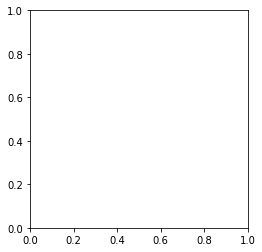

In [18]:
df.dropna()
region_df = df['Regional indicator'].value_counts()

LABELS = df['Regional indicator']
colors = ['lightcoral', 'yellowgreen']
plt.pie(region_df.values, labels=LABELS, colors=colors, autopct='%1.1f%%', shadow=True)